In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

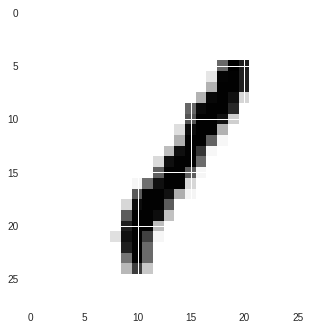

In [0]:
batch_xs, batch_ys = mnist.train.next_batch(1)
plt.imshow(batch_xs.reshape(28,28), cmap='Greys')

In [0]:
X_train, Y_train = mnist.train.images, mnist.train.labels
X_test, Y_test = mnist.test.images, mnist.test.labels
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((55000, 784), (55000, 10), (10000, 784), (10000, 10))

### Deep Neural Network Model (# of hidden layer = 5)

In [0]:
n_hidden1, n_hidden2, n_hidden3, n_hidden4, n_hidden5 = 2500, 2000, 1500, 1000, 500

X = tf.placeholder(tf.float32, [None, 784]) 
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.truncated_normal([784, n_hidden1], stddev = tf.sqrt(2/784)))               ### He 초기값
b1 = tf.Variable(tf.zeros([1, n_hidden1]))                                       
Z1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev = tf.sqrt(2/n_hidden1)))
b2 = tf.Variable(tf.zeros([1, n_hidden2]))
Z2 = tf.nn.relu(tf.matmul(Z1, W2) + b2)                                   

W3 = tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev = tf.sqrt(2/n_hidden2)))
b3 = tf.Variable(tf.zeros([1, n_hidden3]))
Z3 = tf.nn.relu(tf.matmul(Z2, W3) + b3)

W4 = tf.Variable(tf.truncated_normal([n_hidden3, n_hidden4], stddev = tf.sqrt(2/n_hidden3)))
b4 = tf.Variable(tf.zeros([1, n_hidden4]))
Z4 = tf.nn.relu(tf.matmul(Z3, W4) + b4)

W5 = tf.Variable(tf.truncated_normal([n_hidden4, n_hidden5], stddev = tf.sqrt(2/n_hidden4)))
b5 = tf.Variable(tf.zeros([1, n_hidden5]))
Z5 = tf.nn.relu(tf.matmul(Z4, W5) + b5)

W6 = tf.Variable(tf.truncated_normal([n_hidden5, 10], stddev = tf.sqrt(2/(n_hidden5+10))))     ### Xavier 초깃값
b6 = tf.Variable(tf.zeros([1, 10]))
Z6 = tf.nn.softmax(tf.matmul(Z5, W6) + b6)                                       

cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(Z6), axis=1))
train_step = tf.train.AdagradOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Z6, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# my_prediction = tf.cast(tf.argmax(Z6, 1), tf.float32)

In [0]:
batch_size = 100
n_batches = 55000//batch_size
n_batches

550

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
for epoch in range(25):
    
    X_, Y_ = shuffle(X_train, Y_train)
    my_accuracy = sess.run(accuracy, feed_dict = { X: X_train, Y: Y_train })
    print(epoch, my_accuracy)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = { X: X_[start:end], Y: Y_[start:end] })

0 0.11752728
1 0.9477636
2 0.9628
3 0.97425455
4 0.97276366
5 0.9846909
6 0.9775636
7 0.9932182
8 0.9956
9 0.99805456
10 0.99863636
11 0.99912727
12 0.9995273
13 0.99872726
14 0.9994909
15 0.99994546
16 0.9998909
17 0.9999091
18 0.9999818
19 0.99985456
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0


In [0]:
sess.run(accuracy, feed_dict = { X: X_test, Y: Y_test })

0.9826